Loading coastline data ...


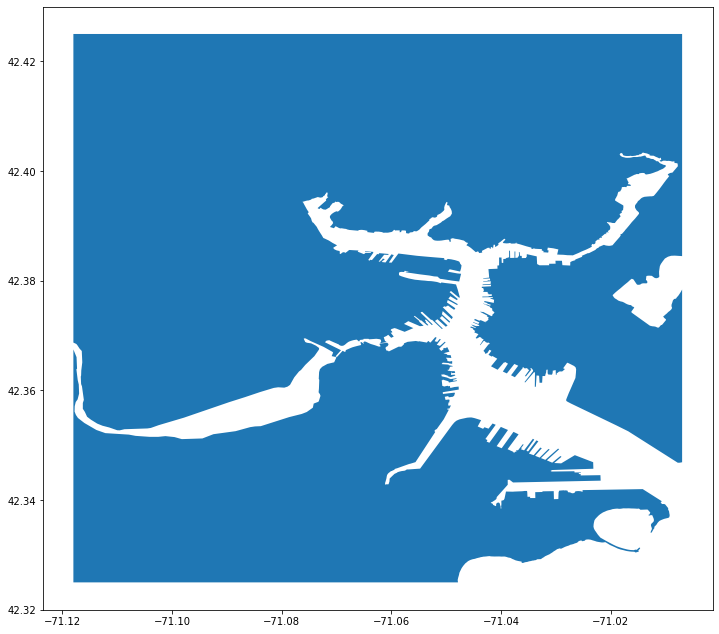

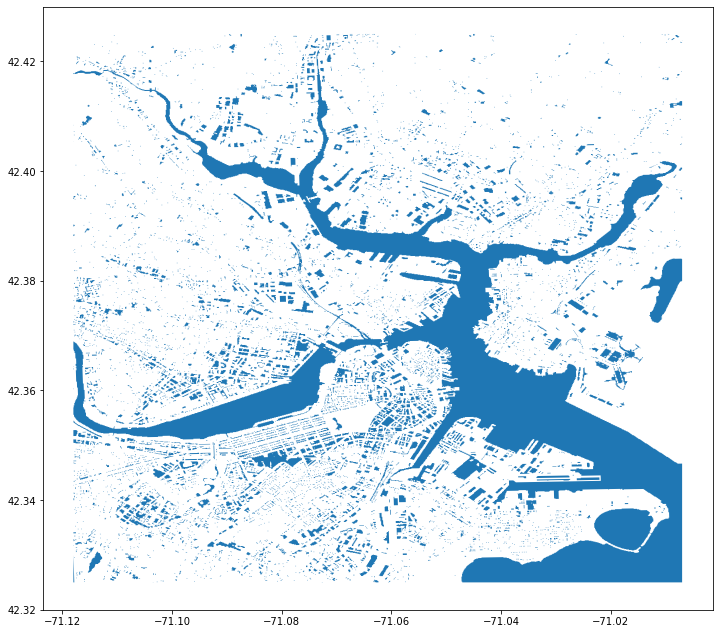

Done!


In [35]:
import os
import geopandas
import numpy as np
import pandas as pd
import copy
import math
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import scipy.interpolate
from seaborn import cubehelix_palette


plt.rcParams['figure.figsize'] = [12,12]

###############################
# Inputs

# Number points in meshgrid
Nmesh = 500

# Maximum travel time (min)
tmax = 200

# Colormap
colormap = 'viridis'

# Plot data points
pltpoints = True

destination = (42.376970, -71.105210)

west = -71.118
east = -71.007
north = 42.425
south = 42.325

# Coastline data
#coastdata = os.path.join(os.getcwd(),'GreaterBoston_shorelines',
#                     'GreaterBoston_shorelines.shp')

# Coastline data
coastdata = os.path.join(os.getcwd(),'data','coastlines','OUTLINE25K_POLY_dd.shp')

coastrow = 0

# Coastline data
massbaydata = os.path.join(os.getcwd(),'data','coastlines','MassBay_Source','MassBay_Source.shp')

massbayrow = 27

###############################
# Main script

# Data path
dpath = os.path.join(os.getcwd(),'data')

# Load coastlines
print('Loading coastline data ...')
longlatcoasts = geopandas.read_file(coastdata)

massbaycoasts = geopandas.read_file(massbaydata)

#trim coastline to bounding box
nw_corner = (west, north)
se_corner = (east, south)
ne_corner = (east, north)
sw_corner = (west, south)

polys1 = geopandas.GeoSeries([Polygon([nw_corner, ne_corner,se_corner, sw_corner])])

square = geopandas.GeoDataFrame({'geometry': polys1})

coastclip = geopandas.overlay(longlatcoasts.loc[[coastrow]],square, how='intersection')

massbayclip = geopandas.overlay(massbaycoasts.loc[[massbayrow]],square, how='intersection')

massbayflip = geopandas.overlay(massbayclip,square, how='symmetric_difference')

coastclip.plot()
plt.show()

massbayflip.plot()
plt.show()

print("Done!")

In [40]:
# Import travel data
fname = 'bostonbig_traveldata.csv'
print("Loading '" + fname +  "' ...")
traveldata = np.loadtxt(os.path.join(dpath,fname),delimiter=',')
x = traveldata[:,1]
y = traveldata[:,0]
z = traveldata[:,2]

# Limits for latitudes and longitudes
latlim = [south, north]
longlim = [west, east]

# Make meshgrid
lats = np.linspace(latlim[0],latlim[1],Nmesh)
longs = np.linspace(longlim[0],longlim[1],Nmesh)
longmesh, latmesh = np.meshgrid(longs, lats)

# Interpolate travel data
print("Interpolating data ...")
rbf = scipy.interpolate.Rbf(x, y, z, function='linear',smooth=0.01)
Z = rbf(longmesh, latmesh)# Loop through points to find cut coastlines
print("Cropping overlay ...")
"""
for ii, long in enumerate(longs):
    for jj, lat in enumerate(lats):
        # Print progress
        if not (ii*len(lats)+jj)%10000:
            print('%i/%i' %(ii*len(lats)+jj,len(lats)*len(longs)))
        point = Point(longs[ii], lats[jj])

        # Check if coastline polygon contains point
        contains = False
        #if longlatcoasts.iloc[coastrow]["geometry"].contains(point):
        if massbayclip.iloc[0]['geometry'].contains(point):
            contains = True
        if not contains:
             Z[jj,ii] = np.nan
"""
print("Done!")

Loading 'bostonbig_traveldata.csv' ...
Interpolating data ...
Cropping overlay ...
Done!


In [41]:
Z = np.flipud(Z)

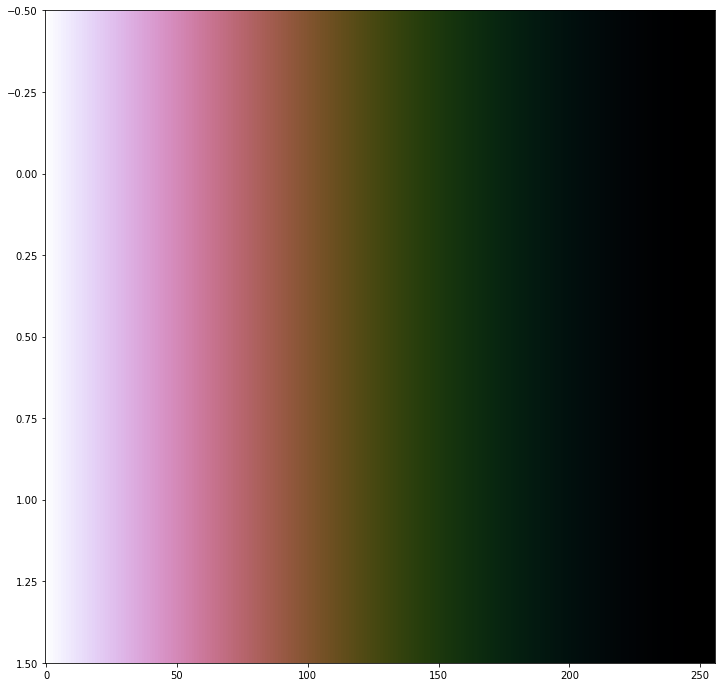

In [53]:
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

customcube = cubehelix_palette(n_colors=6, start=0, rot=-1, gamma=2.0, hue=1, light=1, dark=0, reverse=False, as_cmap=True)
plt.imshow(gradient, aspect='auto', cmap=customcube)
plt.show()

Plotting overlay ...


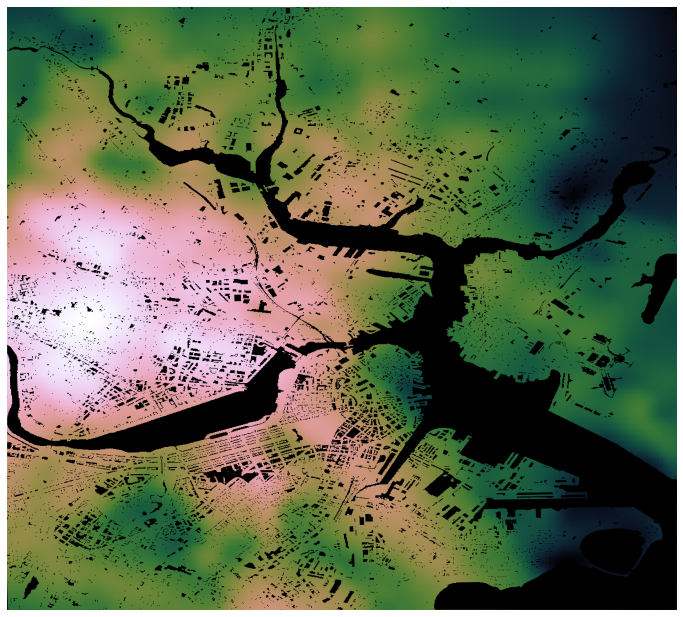

Saving overlay ...
Done!


In [43]:
# Transparency in colormap (nan values)
transp_cmap = copy.copy(plt.cm.get_cmap(colormap))
transp_cmap.set_bad(alpha=0)

# Maximum level
#maxlvl = int(math.ceil(np.nanmax(z) / 10.0)) * 10 + 10



# Plot
print("Plotting overlay ...")
fig, ax = plt.subplots()
#ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
#fig.add_axes(ax)
#plt.contourf(longmesh,latmesh,Z,levels=np.arange(0,tmax,10),cmap=transp_cmap)
#ax.pcolor(longs,lats,Z,cmap='cubehelix_r')
ax.pcolor(longs,lats,Z,cmap=customcube)
#plot(massbayflip,color='k')
#plt.xlim(longlim)
#plt.ylim(latlim)
#fig.set_size_inches(Nmesh/100,Nmesh/100)

massbayflip.plot(color='k',ax=ax)
#plt.show()

plt.show()
# Save plot to file
print("Saving overlay ...")
plt.savefig(os.path.join(dpath,'overlay.png'), dpi=1000,transparent=True,
            bbox_inches=0,pad_inches=0)
plt.close()

# Plot data points
"""
print('Plotting data points')
if pltpoints:
    plt.figure()
    plt.contourf(longmesh,latmesh,Z,levels=np.arange(0,tmax,10),
             cmap=transp_cmap)
    cbar =plt.colorbar()
    cbar.ax.set_ylabel('Travel time (min)')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.xlim(longlim)
    plt.ylim(latlim)
    plt.scatter(x, y,s=0.5,marker='.',color='k')
    plt.savefig(os.path.join(dpath,'datapoints.pdf'))
    plt.show()
"""
print("Done!")

In [ ]:
nw_corner = (-71.118, 42.425)
se_corner = (-71.007, 42.325)
ne_corner = (-71.007, 42.425)
sw_corner = (-71.118, 42.325)


polys1 = geopandas.GeoSeries([Polygon([nw_corner, ne_corner,se_corner, sw_corner])])

square = geopandas.GeoDataFrame({'geometry': polys1})

res_intersection = geopandas.overlay(massbaycoasts.loc[[27]],square, how='intersection')

In [ ]:
res_intersection.plot()

In [ ]:
res_difference = geopandas.overlay(res_intersection,square, how='symmetric_difference')

In [ ]:
res_difference.plot()